In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt 

import mltools.cluster as cluster
reload(cluster)

<module 'mltools.cluster' from 'mltools/cluster.pyc'>

In [2]:
# problem 1(a)
iris = np.genfromtxt("data/iris.txt", delimiter=None)
X = iris[:, 0:2]
Y = iris[:, -1]

In [3]:
print X.shape

(148, 2)


score =  20.9546301963


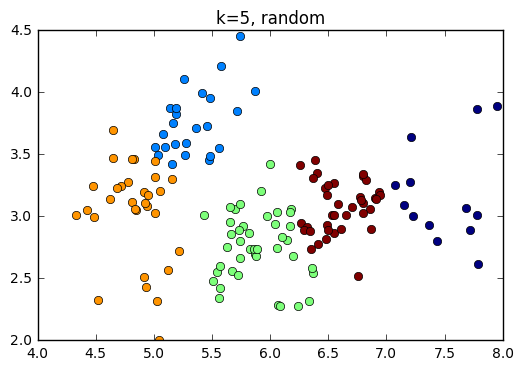

In [13]:
# problem 1(b)
Z, mu, score = cluster.kmeans(X, K=5, init='random')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=5, random")
plt.show()

score =  21.0902063019


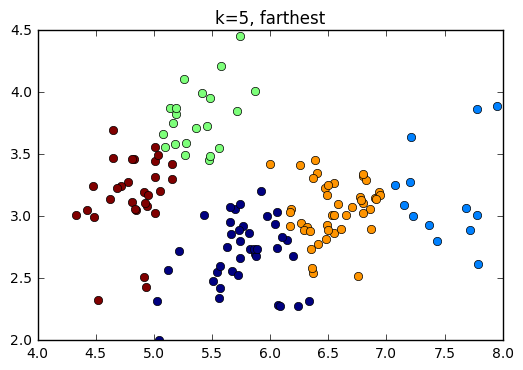

In [14]:
Z, mu, score = cluster.kmeans(X, K=5, init='farthest')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=5, farthest")
plt.show()

score =  25.4039092828


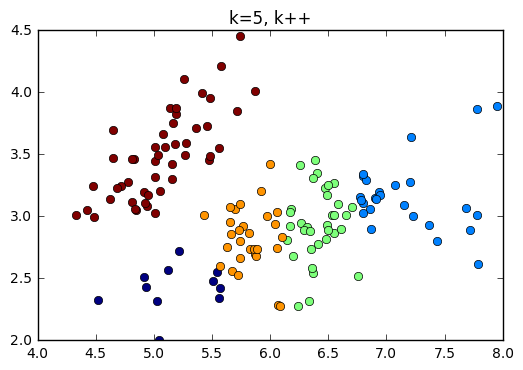

In [15]:
Z, mu, score = cluster.kmeans(X, K=5, init='k++')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=5, k++")
plt.show()

score =  5.32208521097


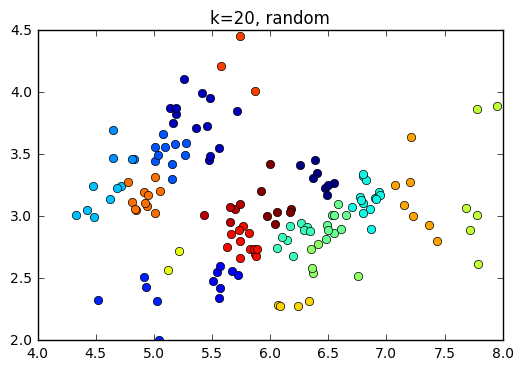

In [16]:
Z, mu, score = cluster.kmeans(X, K=20, init='random')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=20, random")
plt.show()

score =  5.30489001081


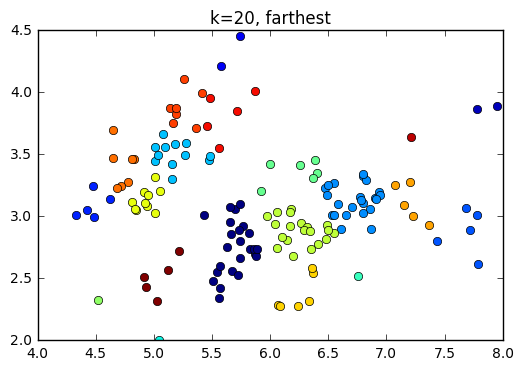

In [17]:
Z, mu, score = cluster.kmeans(X, K=20, init='farthest')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=20, farthest")
plt.show()

score =  4.62096961292


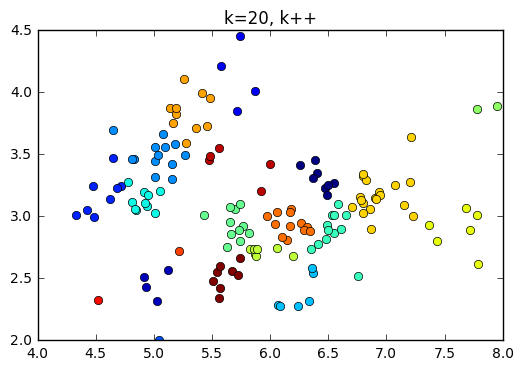

In [18]:
Z, mu, score = cluster.kmeans(X, K=20, init='k++')
ml.plotClassify2D(None, X, Z)
print "score = ",score
plt.title("k=20, k++")
plt.show()

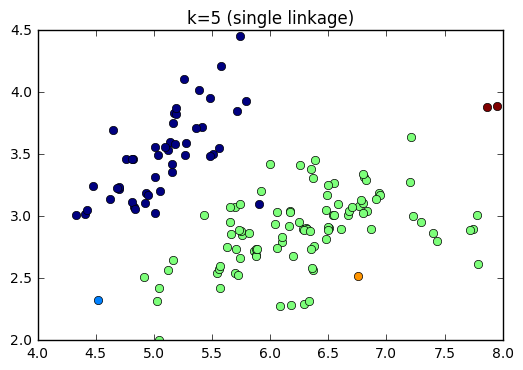

In [19]:
# problem 1(c)
Z, mu = cluster.agglomerative(X, K=5, method='min')
ml.plotClassify2D(None, X, Z)
plt.title("k=5 (single linkage)")
plt.show()

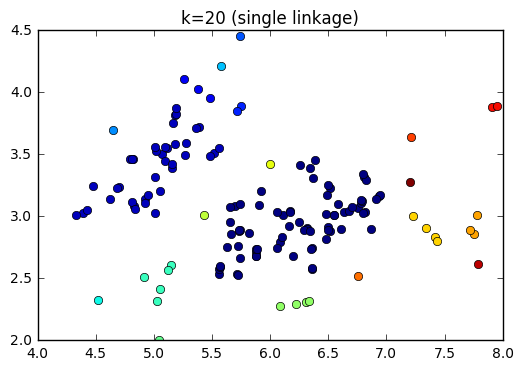

In [20]:
Z, mu = cluster.agglomerative(X, K=20, method='min')
ml.plotClassify2D(None, X, Z)
plt.title("k=20 (single linkage)")
plt.show()

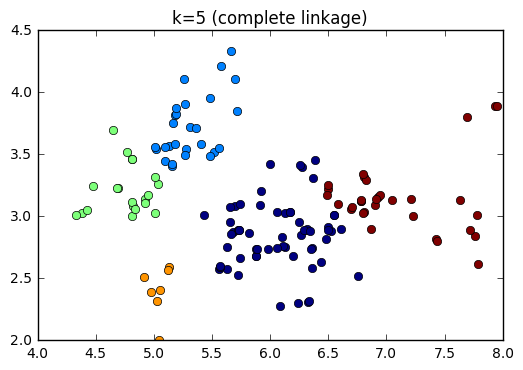

In [21]:
Z, mu = cluster.agglomerative(X, K=5, method='max')
ml.plotClassify2D(None, X, Z)
plt.title("k=5 (complete linkage)")
plt.show()

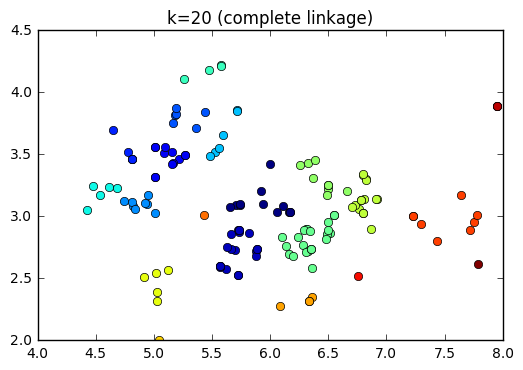

In [27]:
Z, mu = cluster.agglomerative(X, K=20, method='max') 
ml.plotClassify2D(None, X, Z)
plt.title("k=20 (complete linkage)")
plt.show()

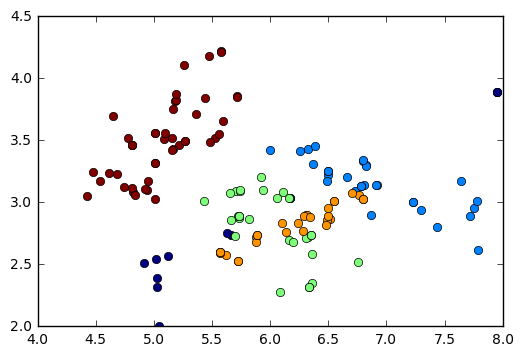

In [28]:
# problem 1(d)
Z,params,prob,LL = cluster.gmmEM(X, K=5, init='random')
ml.plotClassify2D(None, X, Z)
plt.show()

In [ ]:
# problem 2(a)
X = np.genfromtxt("data/faces.txt", delimiter=None)
mu = np.mean(X, axis=0, keepdims=True)         #fine mean over data points
X0 = X-mu                                      # zero-center the data

In [ ]:
# problem 2(b)
import scipy.linalg
U, S, Vh = scipy.linalg.svd(X0, False)         # X0 = U*diag(S)*Vh
W = U.dot(np.diag(S))

In [ ]:
# problem 2(c)
error = [None]*25
for k in range(25):
    Xhat = W[:,:k].dot(Vh[:k,:])
    error[k] = ((X0-Xhat)**2).mean()

plt.plot(error)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Graph of MSE values as a function of K")
plt.show()

In [ ]:
# problem 2(d)
for j in range(1):
    A = 2*np.median(np.abs(W[:,j]))
    image_1 = mu + A*Vh[j,:]
    image_1 = np.reshape(image_1, (24,24))
    image_2 = np.reshape(mu - A*Vh[j,:], (24,24))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image_1.T, cmap="gray")
axarr[1].imshow(image_2.T, cmap="gray")
plt.title("First principal directions of data")
plt.show()

In [ ]:
for j in range(2):
    A = 2*np.median(np.abs(W[:,j]))
    image_1 = mu + A*Vh[j,:]
    image_1 = np.reshape(image_1, (24,24))
    image_2 = np.reshape(mu - A*Vh[j,:], (24,24))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image_1.T, cmap="gray")
axarr[1].imshow(image_2.T, cmap="gray")
plt.title("Second principal directions of data")
plt.show()

In [ ]:
for j in range(3):
    A = 2*np.median(np.abs(W[:,j]))
    image_1 = mu + A*Vh[j,:]
    image_1 = np.reshape(image_1, (24,24))
    image_2 = np.reshape(mu - A*Vh[j,:], (24,24))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image_1.T, cmap="gray")
axarr[1].imshow(image_2.T, cmap="gray")
plt.title("Third principal directions of data")
plt.show()

In [ ]:
# problem 2(e)
K = [5,10,50,100]
image_3 = np.reshape(X[22,:], (24,24))
plt.imshow(image_3.T, cmap="gray")
plt.title("Original image")
plt.show()

In [ ]:
f, axarr = plt.subplots(1,4)
for i,k in enumerate(K):
    image_3 = mu + W[22,:k].dot(Vh[:k,:])
    image_3 = np.reshape(image_3, (24,24))
    axarr[i].imshow(image_3.T, cmap="gray")

axarr[0].set_xlabel("k=5")
axarr[1].set_xlabel("k=10")
axarr[2].set_xlabel("k=50")
axarr[3].set_xlabel("k=100")
plt.show()

In [ ]:
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] )
plt.figure(); plt.hold(True);

random_no = np.random.rand(25)
idx = np.floor(1000*random_no)
for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) 
    plt.imshow( img.T , cmap="gray", extent=loc )
    plt.axis( (-2,2,-2,2) )
plt.show()